In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('../data/processed/cleaned_dataset.csv')

In [22]:
df.shape

(21541, 19)

In [3]:
df.head()

,X,Y,ContainmentDateTime,ControlDateTime,DailyAcres,DiscoveryAcres,FireCause,FireDiscoveryDateTime,IncidentTypeCategory,IncidentTypeKind,InitialLatitude,InitialLongitude,IrwinID,LocalIncidentIdentifier,POOCounty,POODispatchCenterID,POOFips,POOState,UniqueFireIdentifier
0,-111.348611,33.195755,2020-07-23 05:29:59+00:00,2020-07-23 05:29:59+00:00,8.0,2.5,Human,2020-07-22 21:51:00+00:00,WF,FI,33.195810,-111.348700,{951823FA-0B72-4295-87C8-E042D602324E},1450,Pinal,AZTDC,4021,US-AZ,2020-AZA3S-001450
1,-115.748812,40.617506,2020-08-03 23:00:00+00:00,2020-09-02 15:00:00+00:00,5985.9,5.0,Natural,2020-07-19 23:00:00+00:00,WF,FI,40.602563,-115.719777,{91E0CBAB-A24E-4590-B6C6-2B4A46907E8A},10145,Elko,NVEIC,32007,US-NV,2020-NVECFX-010145
2,-108.193611,39.858486,2020-08-30 00:00:00+00:00,2020-09-10 14:00:00+00:00,0.1,1.0,Natural,2020-08-29 21:46:00+00:00,WF,FI,39.891710,-108.266500,{3568D344-E3FB-415C-8014-ED34ECEAAB25},323,Rio Blanco,COCRC,8103,US-CO,2020-COWRD-000323
3,-109.703111,40.227646,2020-10-28 20:15:00+00:00,2020-10-28 20:15:00+00:00,0.1,0.1,Human,2020-10-28 19:37:00+00:00,WF,FI,40.227700,-109.703169,{4BEBC503-DACD-4198-A1D8-323B614DA555},100463,Uintah,UTUBC,49047,US-UT,2020-UTNES-100463
4,-110.385511,31.961145,2020-07-10 18:14:59+00:00,2020-07-10 18:14:59+00:00,0.1,0.1,Human,2020-07-09 16:34:59+00:00,WF,FI,31.961200,-110.385600,{FB125AAC-0DE2-4547-A2D3-32891D98CB0F},1263,Cochise,AZTDC,4003,US-AZ,2020-AZA3S-001263


<AxesSubplot: xlabel='FireCause', ylabel='Count'>

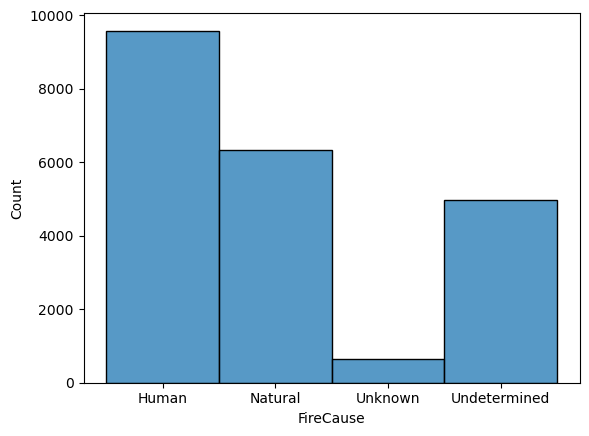

In [4]:
sns.histplot(df['FireCause'])

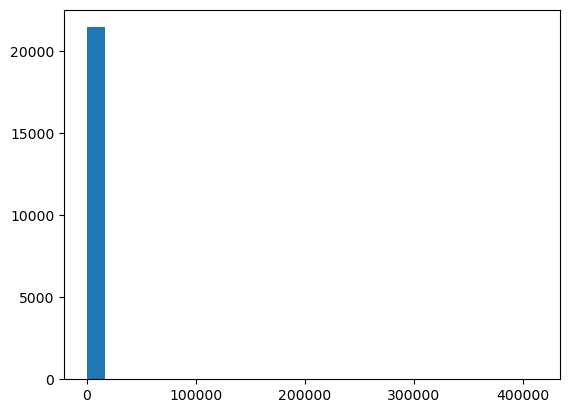

In [5]:
plt.hist(df['DailyAcres'], bins = 25);

<AxesSubplot: >

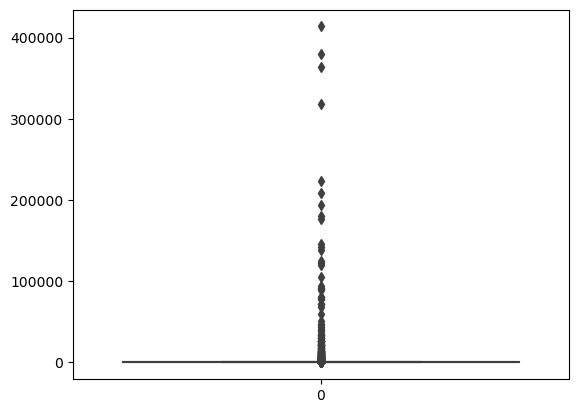

In [6]:
sns.boxplot(data = df['DailyAcres'])

In [7]:
df['DailyAcres'].mean()

307.96860695406514

In [8]:
df['DailyAcres'].median()

0.1

In [9]:
df['FireDiscoveryDateTime'] = pd.to_datetime(df['FireDiscoveryDateTime'])
df['ControlDateTime'] = pd.to_datetime(df['ControlDateTime'])
df['ContainmentDateTime'] = pd.to_datetime(df['ContainmentDateTime'])

In [10]:
df['TimeToContained'] = df['ContainmentDateTime'] - df['FireDiscoveryDateTime']
df['TimeToControlled'] = df['ControlDateTime'] - df['FireDiscoveryDateTime']

In [11]:
print(f"Time to Controlled Mean: {df['TimeToControlled'].mean()} and Median: {df['TimeToControlled'].median()}")
print(f"Time to Contained Mean: {df['TimeToContained'].mean()} and Median: {df['TimeToContained'].median()}")

Time to Controlled Mean: 3 days 05:55:11.278120792 and Median: 0 days 07:01:59
Time to Contained Mean: 1 days 10:26:19.465762963 and Median: 0 days 02:07:01


In [12]:
big = df[df['DailyAcres'] > 10]
big.shape

(1843, 21)

In [13]:
print(f"Time to Controlled Mean: {big['TimeToControlled'].mean()} and Median: {big['TimeToControlled'].median()}")
print(f"Time to Contained Mean: {big['TimeToContained'].mean()} and Median: {big['TimeToContained'].median()}")

Time to Controlled Mean: 15 days 00:17:09.180141074 and Median: 5 days 03:26:10
Time to Contained Mean: 7 days 17:59:15.082474226 and Median: 2 days 00:00:59


In [14]:
big['DailyAcres'].value_counts(normalize=True)

20.00     0.021161
15.00     0.017363
30.00     0.013022
13.00     0.012480
25.00     0.012480
            ...   
348.28    0.000543
681.10    0.000543
267.00    0.000543
59.72     0.000543
14.20     0.000543
Name: DailyAcres, Length: 1039, dtype: float64

<AxesSubplot: >

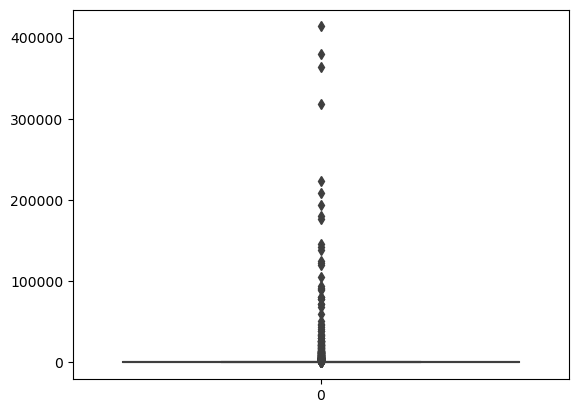

In [15]:
big.reset_index(drop = True, inplace = True)
sns.boxplot(data = big['DailyAcres'])

In [16]:
big['DailyAcres'].mean(), big['DailyAcres'].median()

(3593.064546391755, 60.02)

In [17]:
df.head()

,X,Y,ContainmentDateTime,ControlDateTime,DailyAcres,DiscoveryAcres,FireCause,FireDiscoveryDateTime,IncidentTypeCategory,IncidentTypeKind,...,InitialLongitude,IrwinID,LocalIncidentIdentifier,POOCounty,POODispatchCenterID,POOFips,POOState,UniqueFireIdentifier,TimeToContained,TimeToControlled
0,-111.348611,33.195755,2020-07-23 05:29:59+00:00,2020-07-23 05:29:59+00:00,8.0,2.5,Human,2020-07-22 21:51:00+00:00,WF,FI,...,-111.348700,{951823FA-0B72-4295-87C8-E042D602324E},1450,Pinal,AZTDC,4021,US-AZ,2020-AZA3S-001450,0 days 07:38:59,0 days 07:38:59
1,-115.748812,40.617506,2020-08-03 23:00:00+00:00,2020-09-02 15:00:00+00:00,5985.9,5.0,Natural,2020-07-19 23:00:00+00:00,WF,FI,...,-115.719777,{91E0CBAB-A24E-4590-B6C6-2B4A46907E8A},10145,Elko,NVEIC,32007,US-NV,2020-NVECFX-010145,15 days 00:00:00,44 days 16:00:00
2,-108.193611,39.858486,2020-08-30 00:00:00+00:00,2020-09-10 14:00:00+00:00,0.1,1.0,Natural,2020-08-29 21:46:00+00:00,WF,FI,...,-108.266500,{3568D344-E3FB-415C-8014-ED34ECEAAB25},323,Rio Blanco,COCRC,8103,US-CO,2020-COWRD-000323,0 days 02:14:00,11 days 16:14:00
3,-109.703111,40.227646,2020-10-28 20:15:00+00:00,2020-10-28 20:15:00+00:00,0.1,0.1,Human,2020-10-28 19:37:00+00:00,WF,FI,...,-109.703169,{4BEBC503-DACD-4198-A1D8-323B614DA555},100463,Uintah,UTUBC,49047,US-UT,2020-UTNES-100463,0 days 00:38:00,0 days 00:38:00
4,-110.385511,31.961145,2020-07-10 18:14:59+00:00,2020-07-10 18:14:59+00:00,0.1,0.1,Human,2020-07-09 16:34:59+00:00,WF,FI,...,-110.385600,{FB125AAC-0DE2-4547-A2D3-32891D98CB0F},1263,Cochise,AZTDC,4003,US-AZ,2020-AZA3S-001263,1 days 01:40:00,1 days 01:40:00
